### LOGISTIC REGRESSION

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Import ML library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics



In [3]:
candidates=pd.read_csv("C:/Users/Charumathi/Desktop/candidates.csv")
candidates

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [4]:
X=candidates[['gmat','gpa','work_experience']]
Y=candidates['admitted']

In [6]:
candidates.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.095000,3.425000,0.475000
std,61.427464,0.631218,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [11]:
#Spliting the data into Training and Testing set
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.25,random_state=0)

In [13]:
#Applying Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
Y_pred = logistic_regression.predict(X_test)
Y_pred

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

Accuracy:  0.7


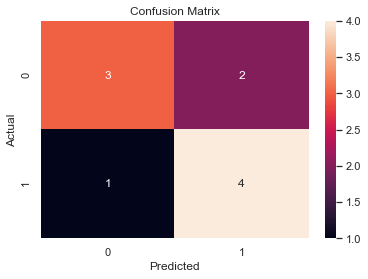

In [26]:
#CONFUSION MATRIX
confusion_matrix=pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True).set_title('Confusion Matrix')
print('Accuracy: ',metrics.accuracy_score(Y_test, Y_pred))
plt.show()

In [20]:
acc_score=metrics.accuracy_score(Y_test,Y_pred)
print("Accuracy Score",acc_score)
print("Accuracy percentage", int(acc_score*100),'%')

Accuracy Score 0.7
Accuracy percentage 70 %


In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

             precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.67      0.80      0.73         5

avg / total       0.71      0.70      0.70        10



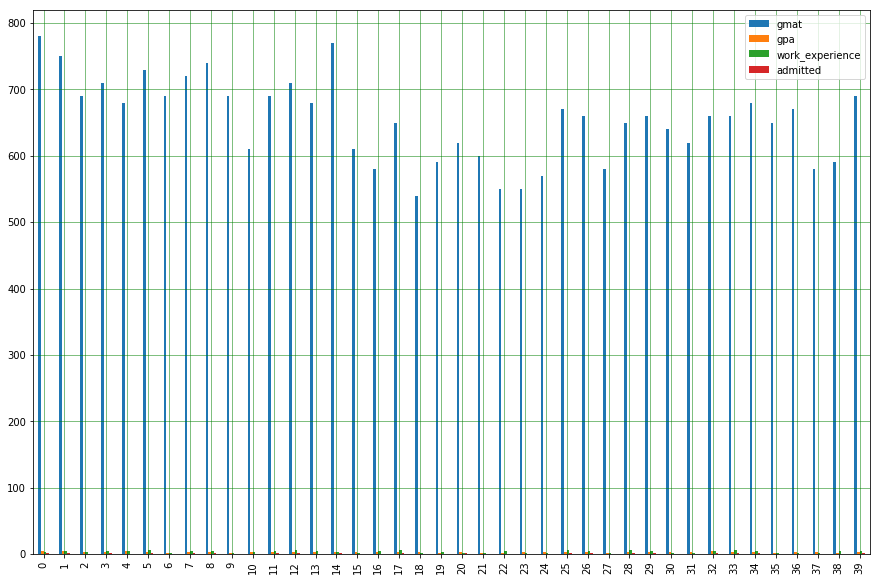

In [8]:
candidates.plot(kind='bar',figsize=(15,10))
plt.grid(which='major',linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5', color='black')

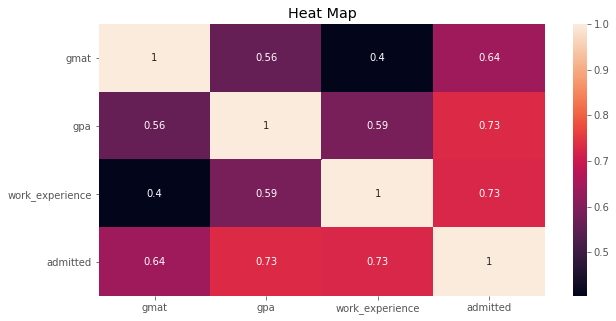

In [22]:
#Heat map
plt.figure(figsize=(10,5))
sns.heatmap(candidates.corr(), annot=True).set_title("Heat Map")
plt.show()

In [9]:
candidates.isnull().sum()

gmat               0
gpa                0
work_experience    0
admitted           0
dtype: int64

Text(0.5,1,'Countplot for no.of candidates admitted')

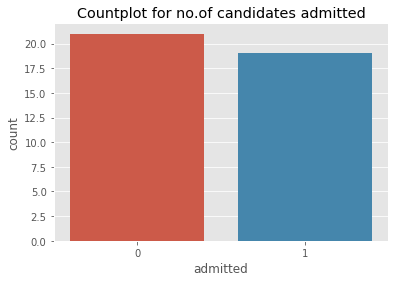

In [17]:
#Countplot for No.of candidates admitted
sns.countplot(x='admitted',data=candidates).set_title('Countplot for no.of candidates admitted')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026B33B6B668>,
      dtype=object)

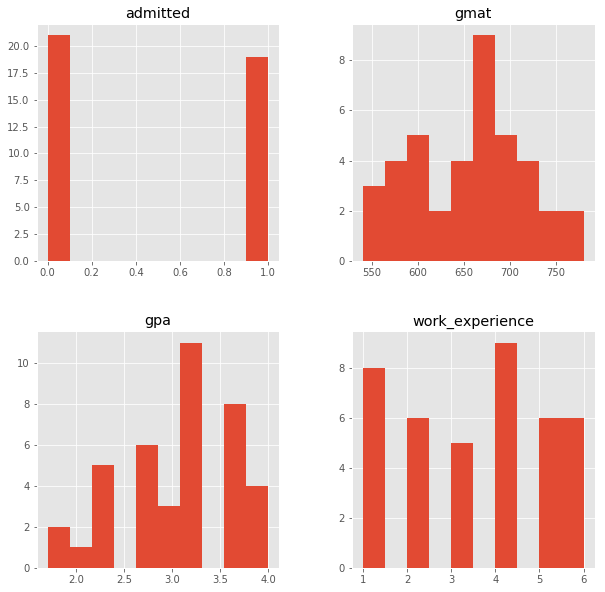

In [16]:
#HIstogram
candidates.hist(bins=10,figsize=(10,10))

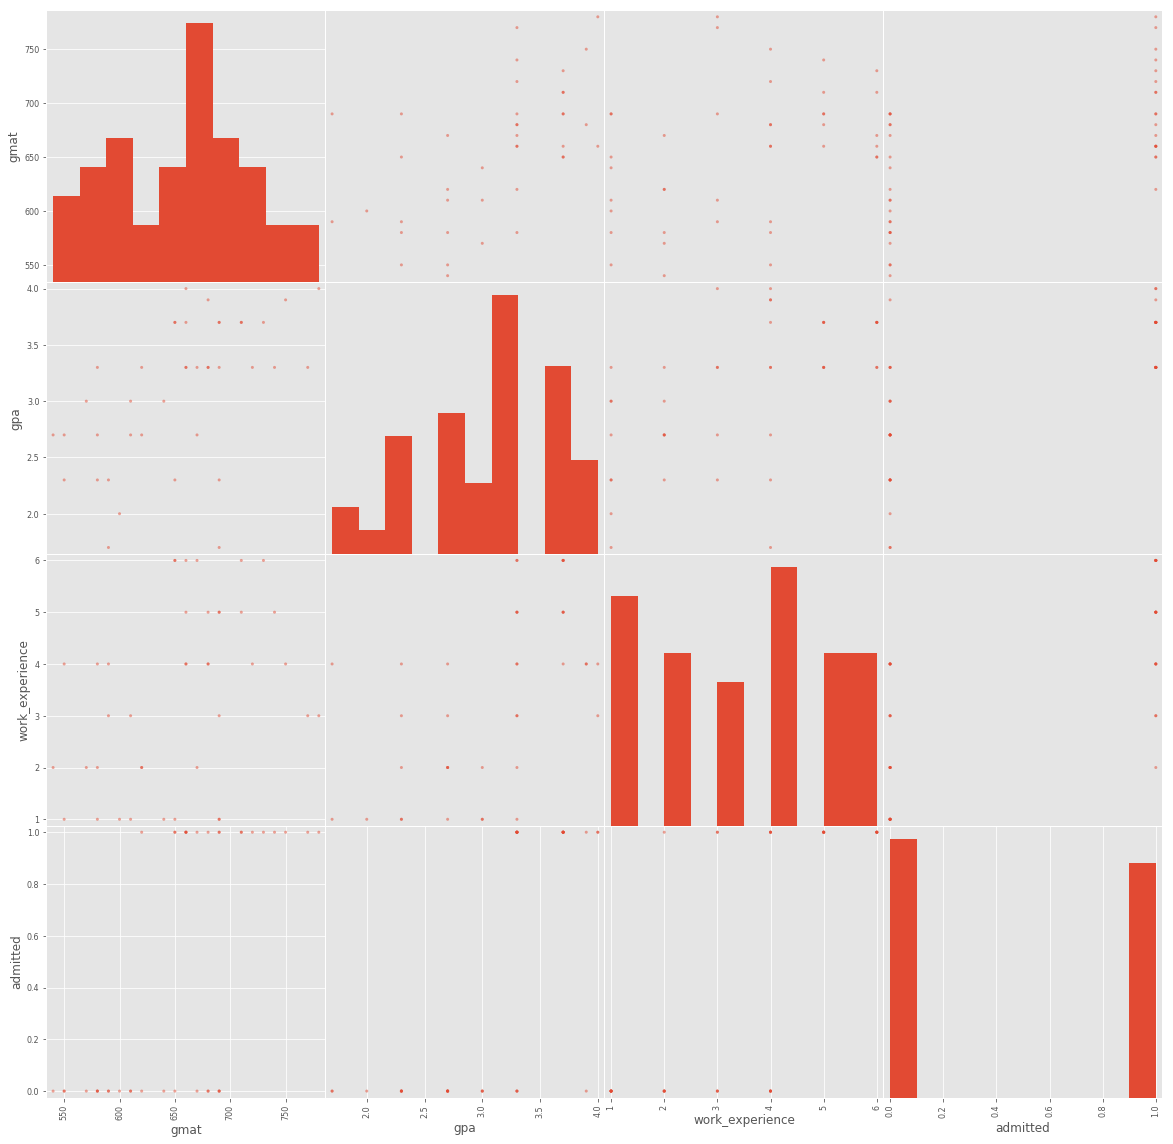

In [18]:
#scatter matrix plot
from pandas.plotting import scatter_matrix
scatter_matrix(candidates,figsize=(20,20))
plt.show()

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


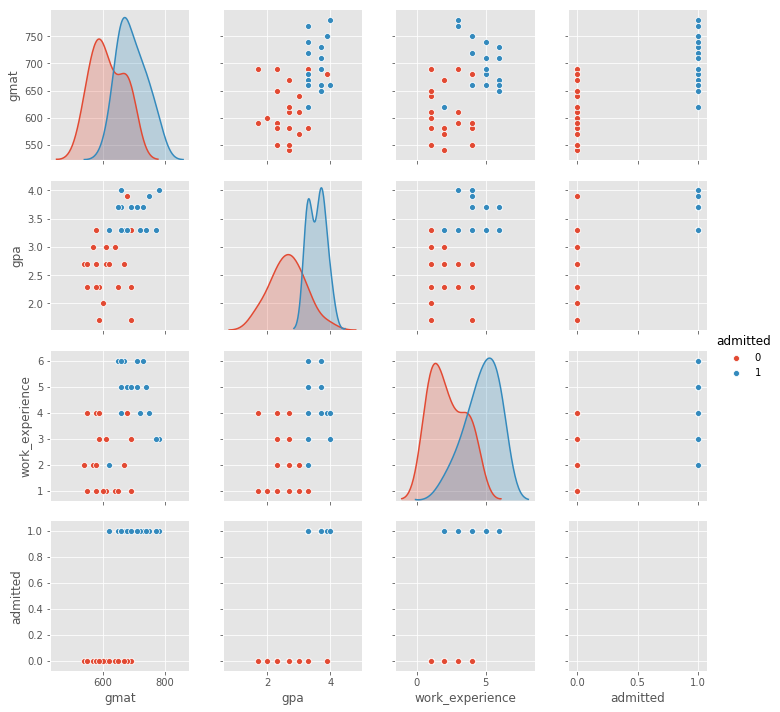

In [19]:
#Pairplot
sns.pairplot(candidates,hue='admitted')
plt.show()

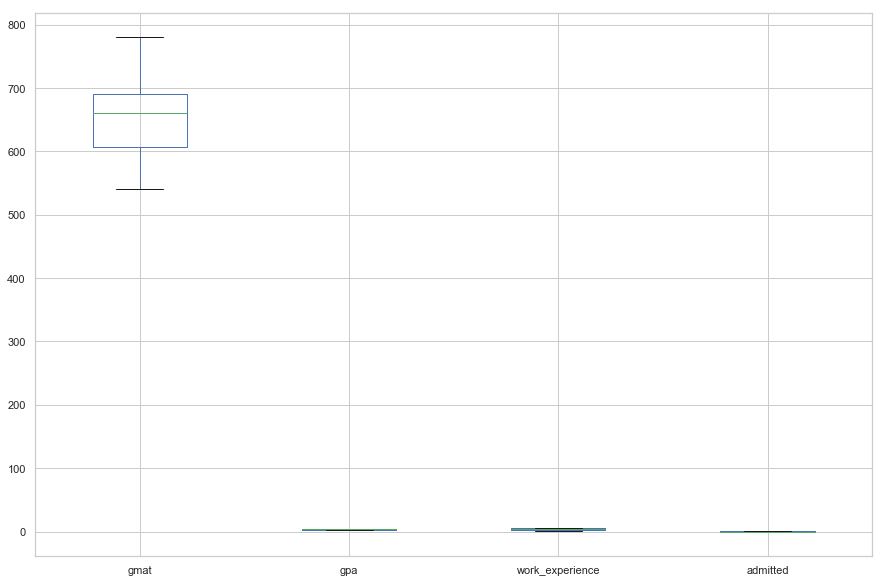

In [8]:
#Box plot
sns.set(style='whitegrid')
candidates.boxplot(figsize=(15,10))
plt.show()